data cleaning for dataset from glassdoor

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("rashikrahmanpritom/data-science-job-posting-on-glassdoor")

# print("Path to dataset files:", path)

C:\Users\manir\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 1.53M/1.53M [00:00<00:00, 8.61MB/s]

Extracting files...
Path to dataset files: C:\Users\manir\.cache\kagglehub\datasets\rashikrahmanpritom\data-science-job-posting-on-glassdoor\versions\1


In [3]:
import pandas as pd

# Replace 'path_to_your_file.csv' with the actual file path
df = pd.read_csv(r'C:\Users\manir\.cache\kagglehub\datasets\rashikrahmanpritom\data-science-job-posting-on-glassdoor\versions\1\Uncleaned_DS_jobs.csv')


In [4]:
# Display the first few rows to understand the structure of the dataset
print(df.head())


   index          Job Title               Salary Estimate  \
0      0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1      1     Data Scientist  $137K-$171K (Glassdoor est.)   
2      2     Data Scientist  $137K-$171K (Glassdoor est.)   
3      3     Data Scientist  $137K-$171K (Glassdoor est.)   
4      4     Data Scientist  $137K-$171K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA

In [15]:
# Remove any text in parentheses
df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'\(.*\)', '', regex=True)

# Remove 'K' and '$' symbols, then split the range into lower and upper bounds
salary_split = df['Salary Estimate'].str.replace('K', '').str.replace('$', '').str.split('-')

# Convert lower and upper bounds to integers and calculate the average
df['min_salary'] = salary_split.str[0].astype(float)
df['max_salary'] = salary_split.str[1].astype(float)
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2



In [17]:
# Replace 'job_description' with 'Job Description'
df['python_skill'] = df['Job Description'].str.contains('Python', case=False, na=False)
df['sql_skill'] = df['Job Description'].str.contains('SQL', case=False, na=False)



In [19]:
# Replace 'company_name' with 'Company Name'
df['Company Name'] = df['Company Name'].str.replace(r'\d+', '', regex=True)



In [22]:
# Split 'Location' column into two separate columns: 'city' and 'state'
location_split = df['Location'].str.split(', ', expand=True)

# Assign the results to new columns, handling cases where there's only one part
df['city'] = location_split[0]
df['state'] = location_split[1]


In [23]:
print(df.head())


   index          Job Title Salary Estimate  \
0      0  Sr Data Scientist      137K-171K    
1      1     Data Scientist      137K-171K    
2      2     Data Scientist      137K-171K    
3      3     Data Scientist      137K-171K    
4      4     Data Scientist      137K-171K    

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

            Company Name       Location            Headquarters  \
0         Healthfirst\n.   New York, NY            New York, NY   
1             ManTech\n.  Chantilly, VA             Herndon, VA   
2      Analysis Group\n.     Boston, MA              Boston, MA   
3             INFICON\n.     Newton, MA  Bad Ragaz, Switzerland 

Dataset Cleaning Summary
The dataset has been cleaned and transformed based on the initial requirements. Below are the details of the transformations applied:

1. Salary Conversion
Extracted minimum and maximum salary values from the Salary Estimate column.
Created new columns:
min_salary: Minimum salary from the estimate.
max_salary: Maximum salary from the estimate.
avg_salary: Calculated average salary.
2. Skill Extraction
Added new columns based on keyword presence in the Job Description column:
python_skill: Indicates if "Python" is mentioned.
sql_skill: Indicates if "SQL" is mentioned.
3. Company Name Cleanup
Removed unwanted trailing characters (e.g., \n.) from Company Name for consistency and cleaner presentation.
4. Location Split
Split the Location column into separate city and state columns for more granular analysis.

Now performing EDA

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [24]:
df.describe()

,index,Rating,Founded,min_salary,max_salary,avg_salary
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,335.500000,3.518601,1635.529762,99.196429,148.130952,123.663690
std,194.133974,1.410329,756.746640,33.009958,48.035110,39.580268
min,0.000000,-1.000000,-1.000000,31.000000,56.000000,43.500000
25%,167.750000,3.300000,1917.750000,79.000000,119.000000,103.000000
50%,335.500000,3.800000,1995.000000,91.000000,133.000000,114.000000
75%,503.250000,4.300000,2009.000000,122.000000,165.000000,136.500000
max,671.000000,5.000000,2019.000000,212.000000,331.000000,271.500000


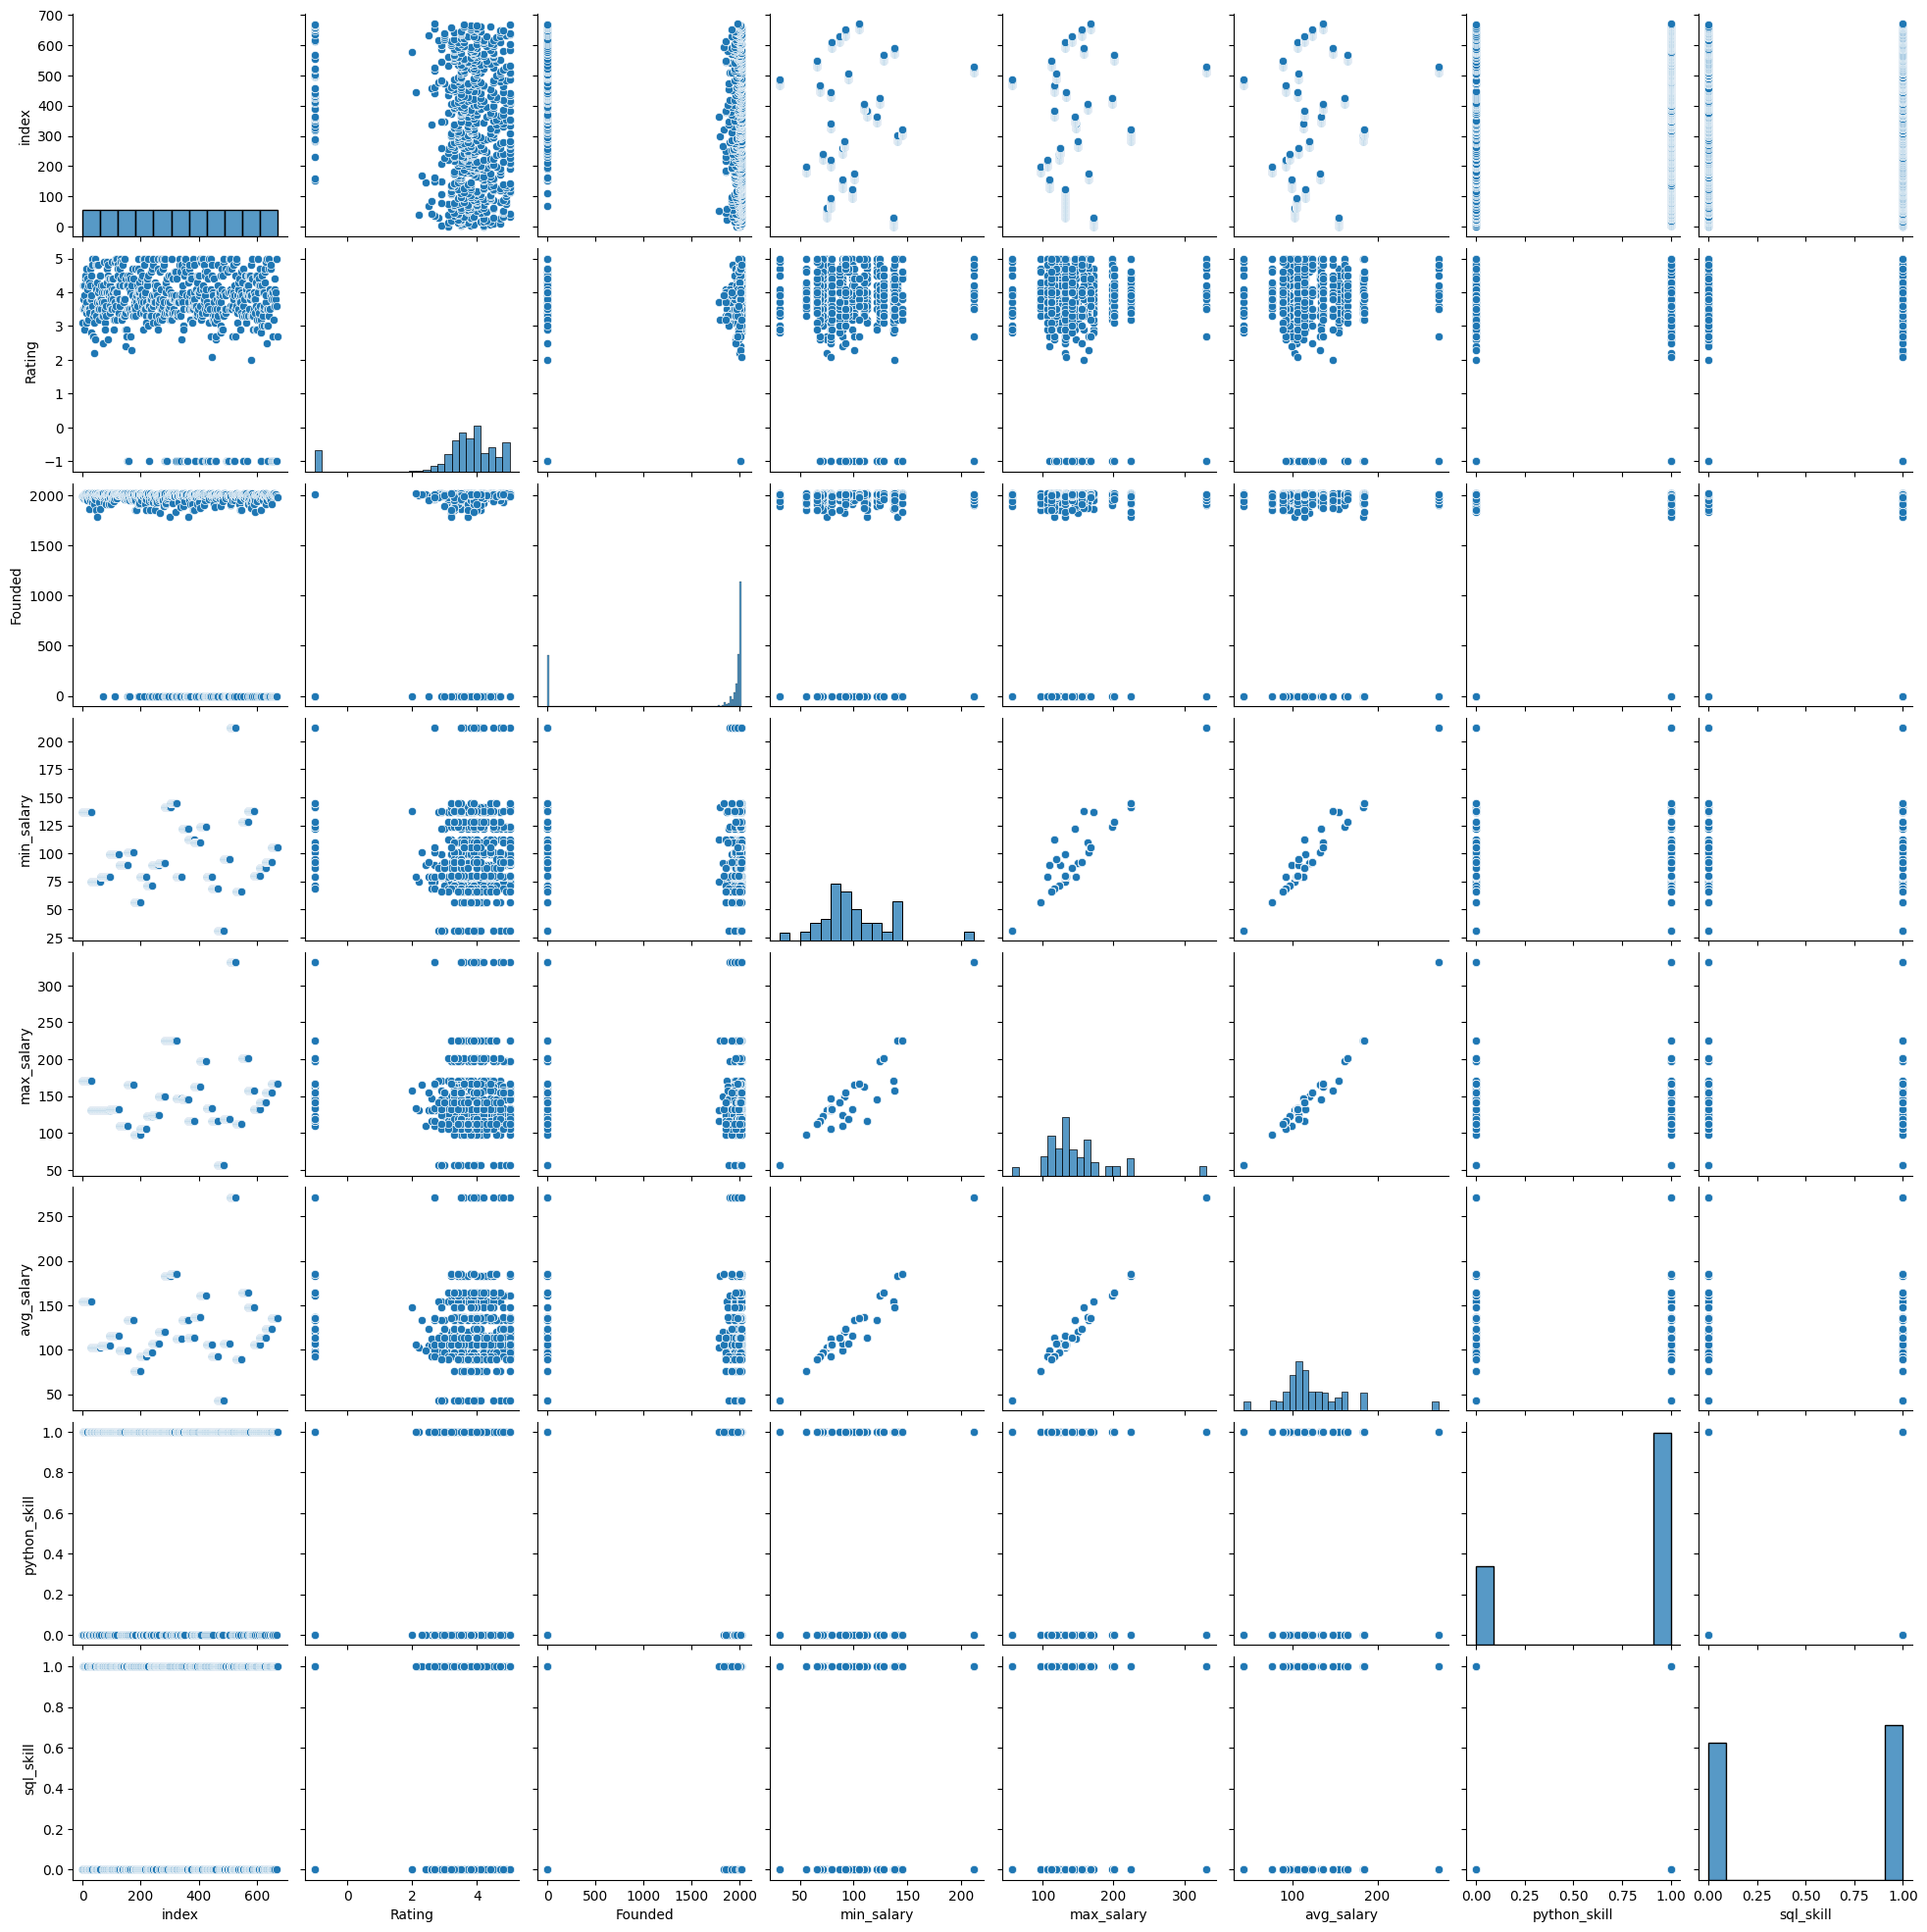

In [27]:
sns.pairplot(df)


<Axes: >

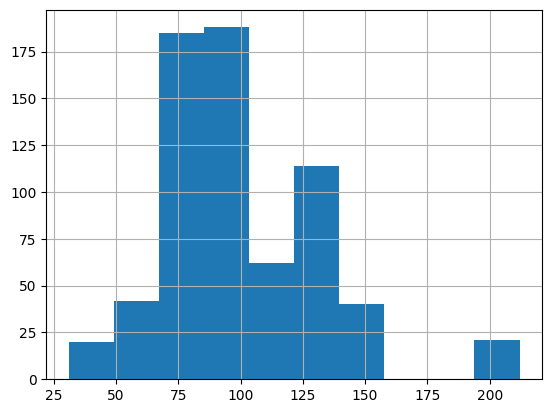

In [28]:
df.min_salary.hist()

<Axes: xlabel='avg_salary'>

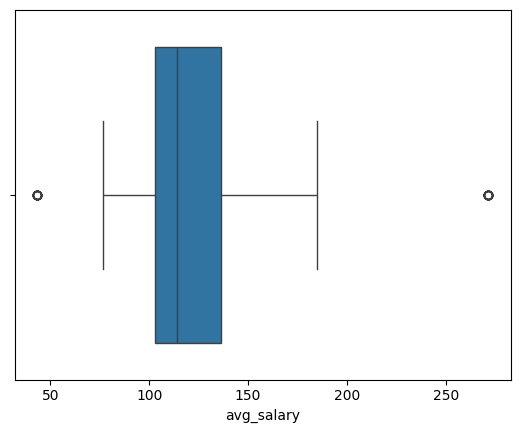

In [29]:
sns.boxplot(x=df["avg_salary"])

In [31]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Calculate company age
df['company_age'] = current_year - df['Founded']

# Handle cases where 'Founded' is missing or invalid
df['company_age'] = df['company_age'].where(df['Founded'] > 0, None)


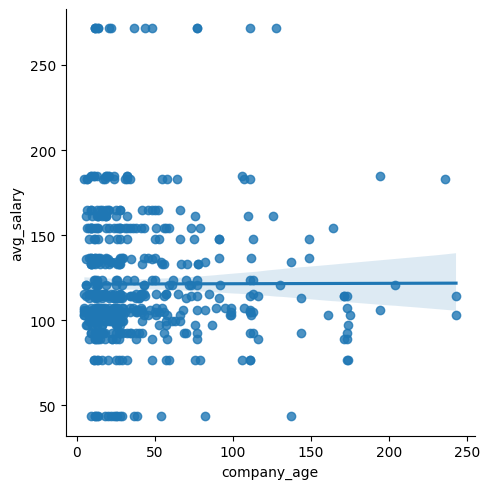

In [32]:
sns.lmplot(x='company_age',y='avg_salary',data=df)

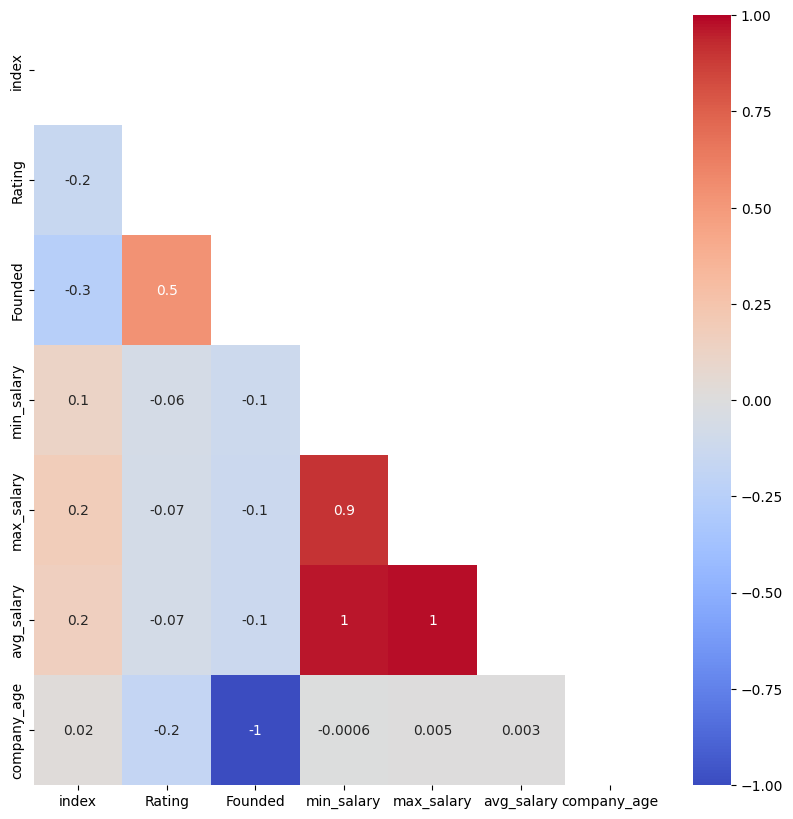

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap="coolwarm", ax=ax)

# Display the heatmap
plt.show()



C:\Users\manir\AppData\Local\Temp\ipykernel_42668\1771754668.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


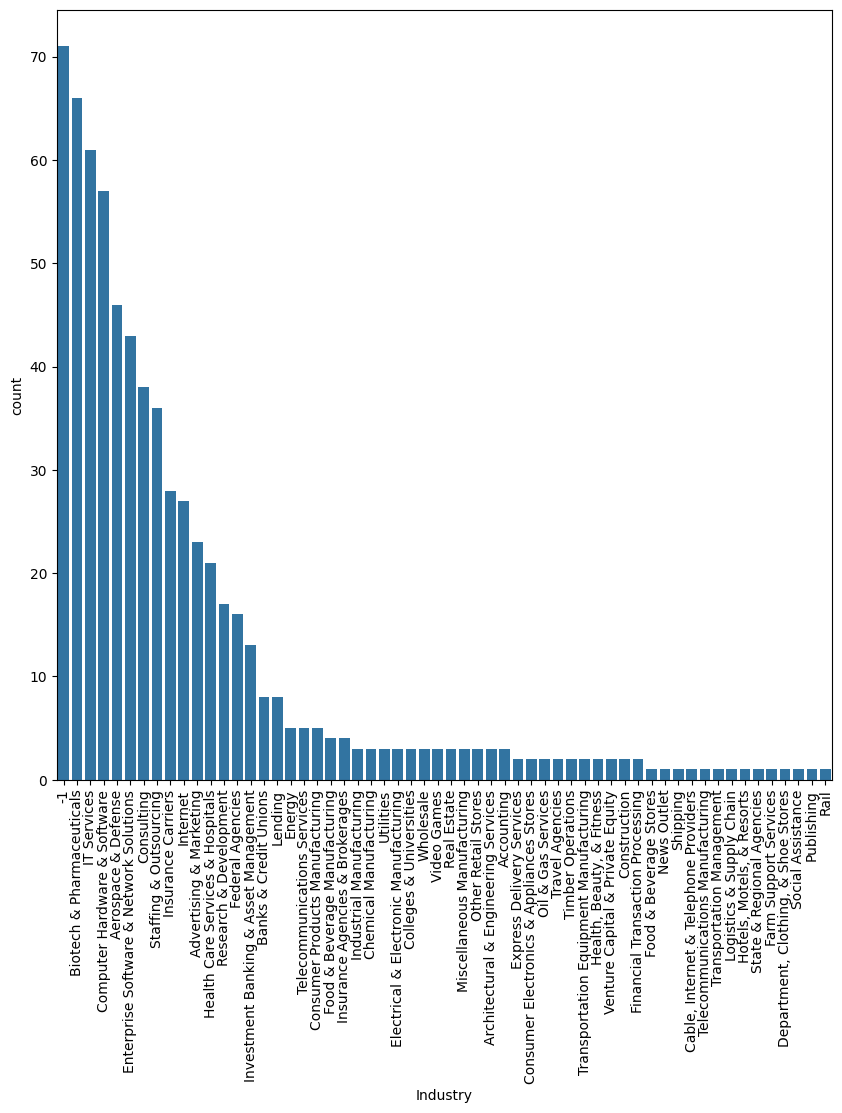

In [36]:
fig, ax = plt.subplots(figsize=(10,10)) 
chart = sns.barplot(x=df.Industry.value_counts().index, y=df.Industry.value_counts())
_=chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.savefig('job industry count.png')

C:\Users\manir\AppData\Local\Temp\ipykernel_42668\2513228611.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=chart.set_xticklabels(chart.get_xticklabels(), rotation=75)


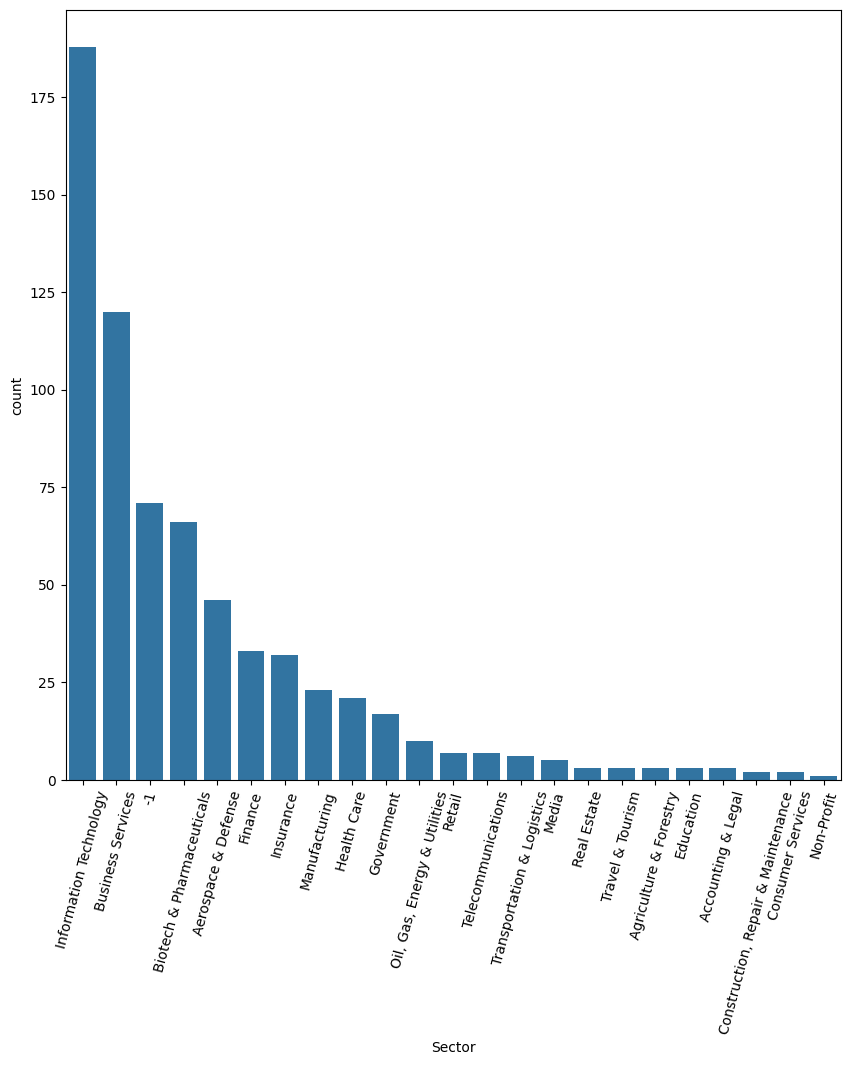

In [37]:
fig, ax = plt.subplots(figsize=(10,10)) 
chart = sns.barplot(x=df.Sector.value_counts().index, y=df.Sector.value_counts())
_=chart.set_xticklabels(chart.get_xticklabels(), rotation=75)

plt.savefig('job sector count.png')

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manir\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


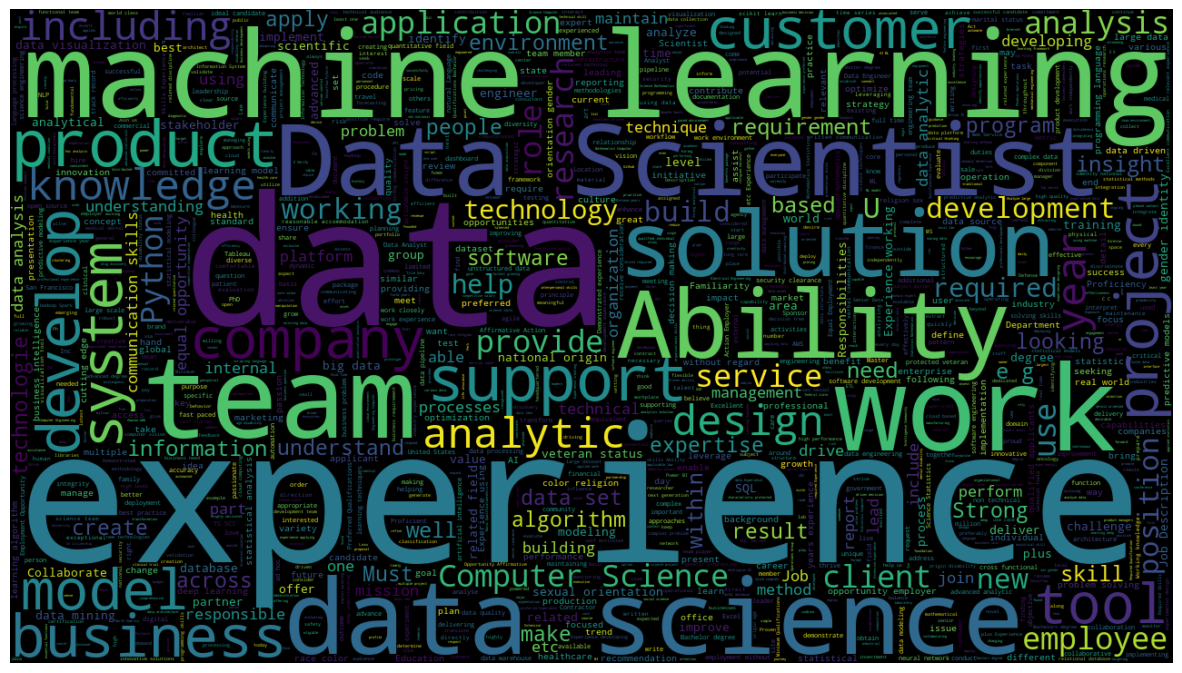

In [40]:
%pip install wordcloud nltk

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk

# Download NLTK stopwords if not already done
nltk.download('stopwords')

# Combine all job descriptions into a single string, handling missing values
words = " ".join(str(desc) for desc in df['Job Description'].dropna())

# Add custom stopwords if desired (e.g., common terms in job postings)
custom_stopwords = set(STOPWORDS).union(set(stopwords.words('english')))

# Generate the word cloud
wordcloud = WordCloud(
    max_words=5000, 
    width=1280, 
    height=720, 
    background_color="black", 
    stopwords=custom_stopwords
).generate(words)

# Display the word cloud
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the word cloud image
wordcloud.to_file('wordcloud.png')
